# **1. Data Collection**

**Source of Data:**

The dataset provided is from IBM HR Analytics Employee Attrition & Performance.

**Suitability:**

This dataset is suitable for analyzing factors that contribute to employee attrition, as it includes a variety of features relevant to employee performance, satisfaction, and demographics.

**Initial Data Overview:**

The dataset contains 1470 entries and 35 columns.
There are no missing values in the dataset.
Columns include both numerical and categorical data.

In [14]:
# Step 1: Data Collection
import pandas as pd
import numpy as np

In [15]:
# Load the dataset
df = pd.read_csv('data.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# **2.  Data cleaning**
**Handling Missing Values And Duplicates**: No missing values or duplicates to handle in this dataset.

Categorical variables are converted to a category data type.

The 'Attrition' and 'OverTime' columns are mapped to binary integers (0 and 1).


**Before:**

1470 entries, no missing values, various data types.

**After:**

No changes in the number of entries. Data types corrected.

In [16]:
# Step 2: Data Cleaning
# Check for null values and duplicates
total_na = df.isna().sum().sum()
has_duplicates = df.duplicated().any()

print("Total null values:", total_na)
print("Any duplicates?:", has_duplicates)

Total null values: 0
Any duplicates?: False


In [17]:
# Convert categorical variables
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
for col in categorical_columns:
    df[col] = df[col].astype('category')

Attrition_mapping = {'Yes': 1, 'No': 0}
df['Attrition'] = df['Attrition'].map(Attrition_mapping)
df['Attrition'] = df['Attrition'].astype(int)

OverTime_mapping = {'Yes': 1, 'No': 0}
df['OverTime'] = df['OverTime'].map(OverTime_mapping)
df['OverTime'] = df['OverTime'].astype(int)

# **3. Exploratory Data Analysis (EDA)**



In [18]:
# Step 3: Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Summary statistics
print(df.describe())

               Age    Attrition    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810     0.161224   802.485714          9.192517     2.912925   
std       9.135373     0.367863   403.509100          8.106864     1.024165   
min      18.000000     0.000000   102.000000          1.000000     1.000000   
25%      30.000000     0.000000   465.000000          2.000000     2.000000   
50%      36.000000     0.000000   802.000000          7.000000     3.000000   
75%      43.000000     0.000000  1157.000000         14.000000     4.000000   
max      60.000000     1.000000  1499.000000         29.000000     5.000000   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate  \
count         1470.0     1470.000000              1470.000000  1470.000000   
mean             1.0     1024.865306                 2.721769    65.891156   
std              0.0      602.024335                 1

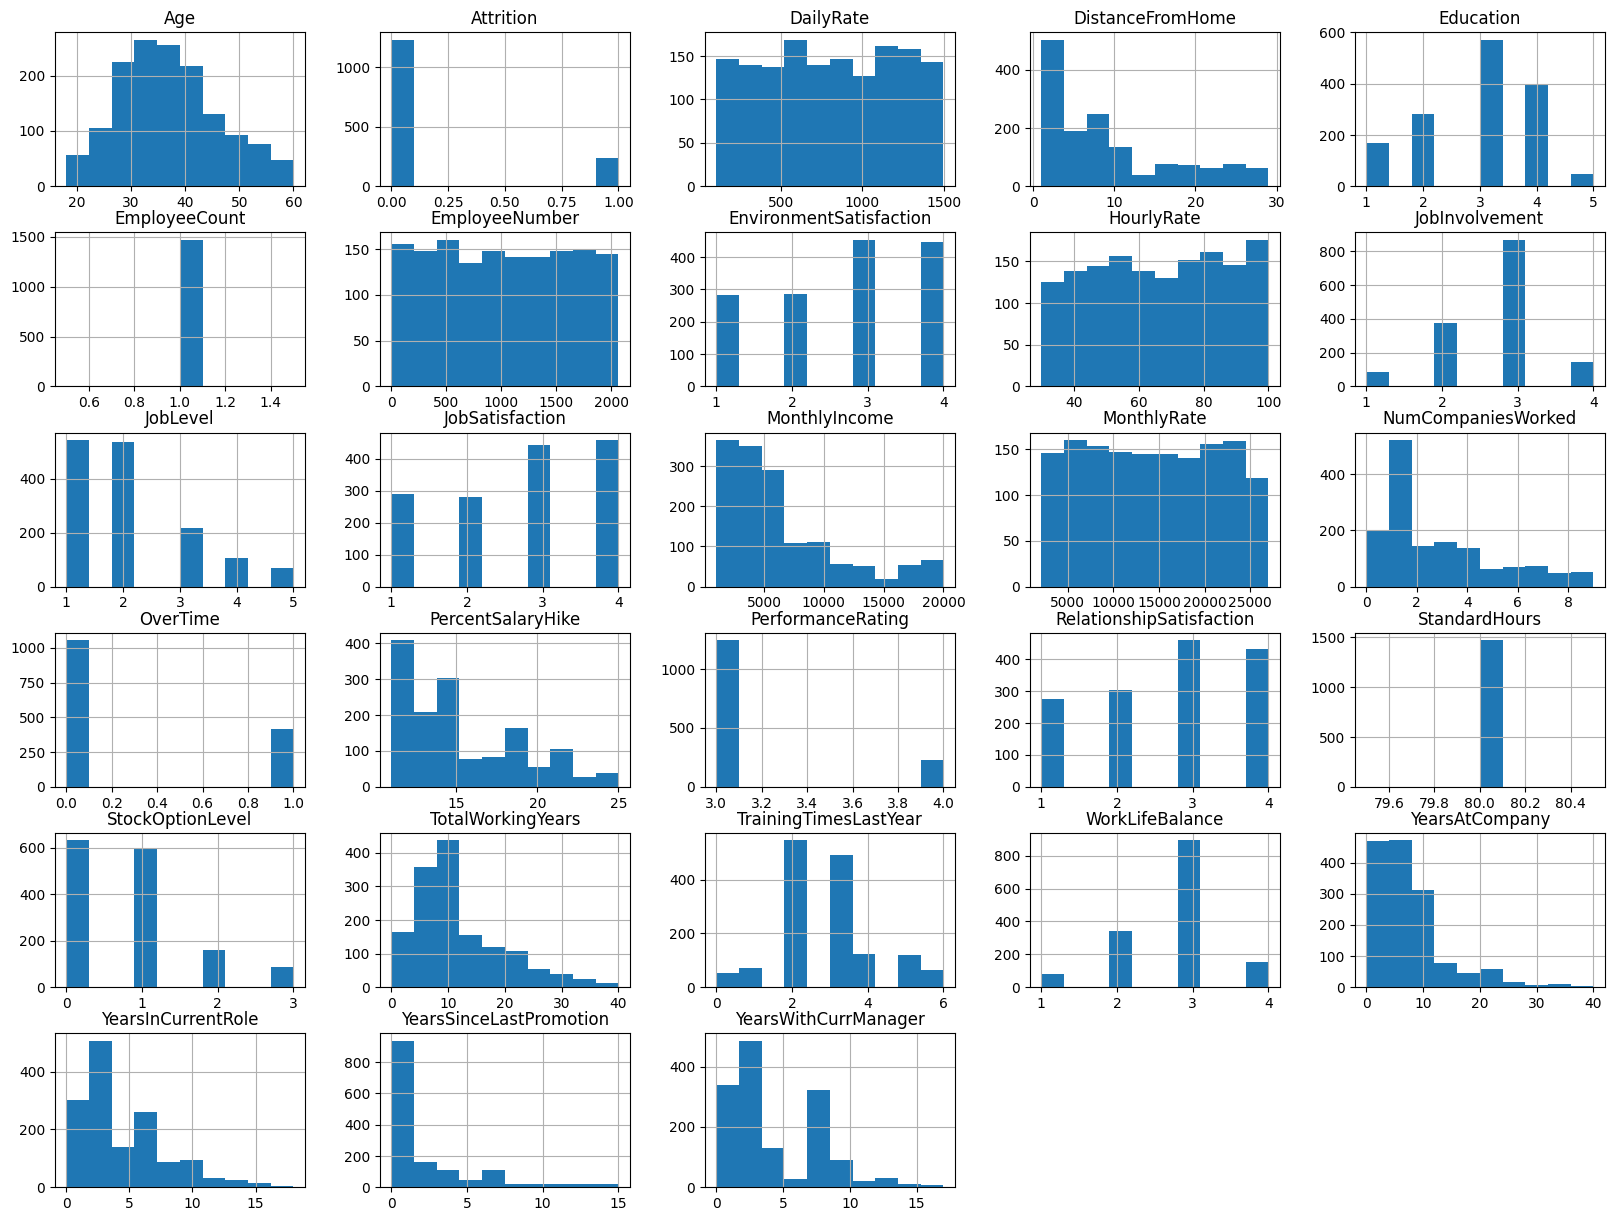

In [20]:
# Histograms
df.hist(figsize=(20, 15))
plt.show()

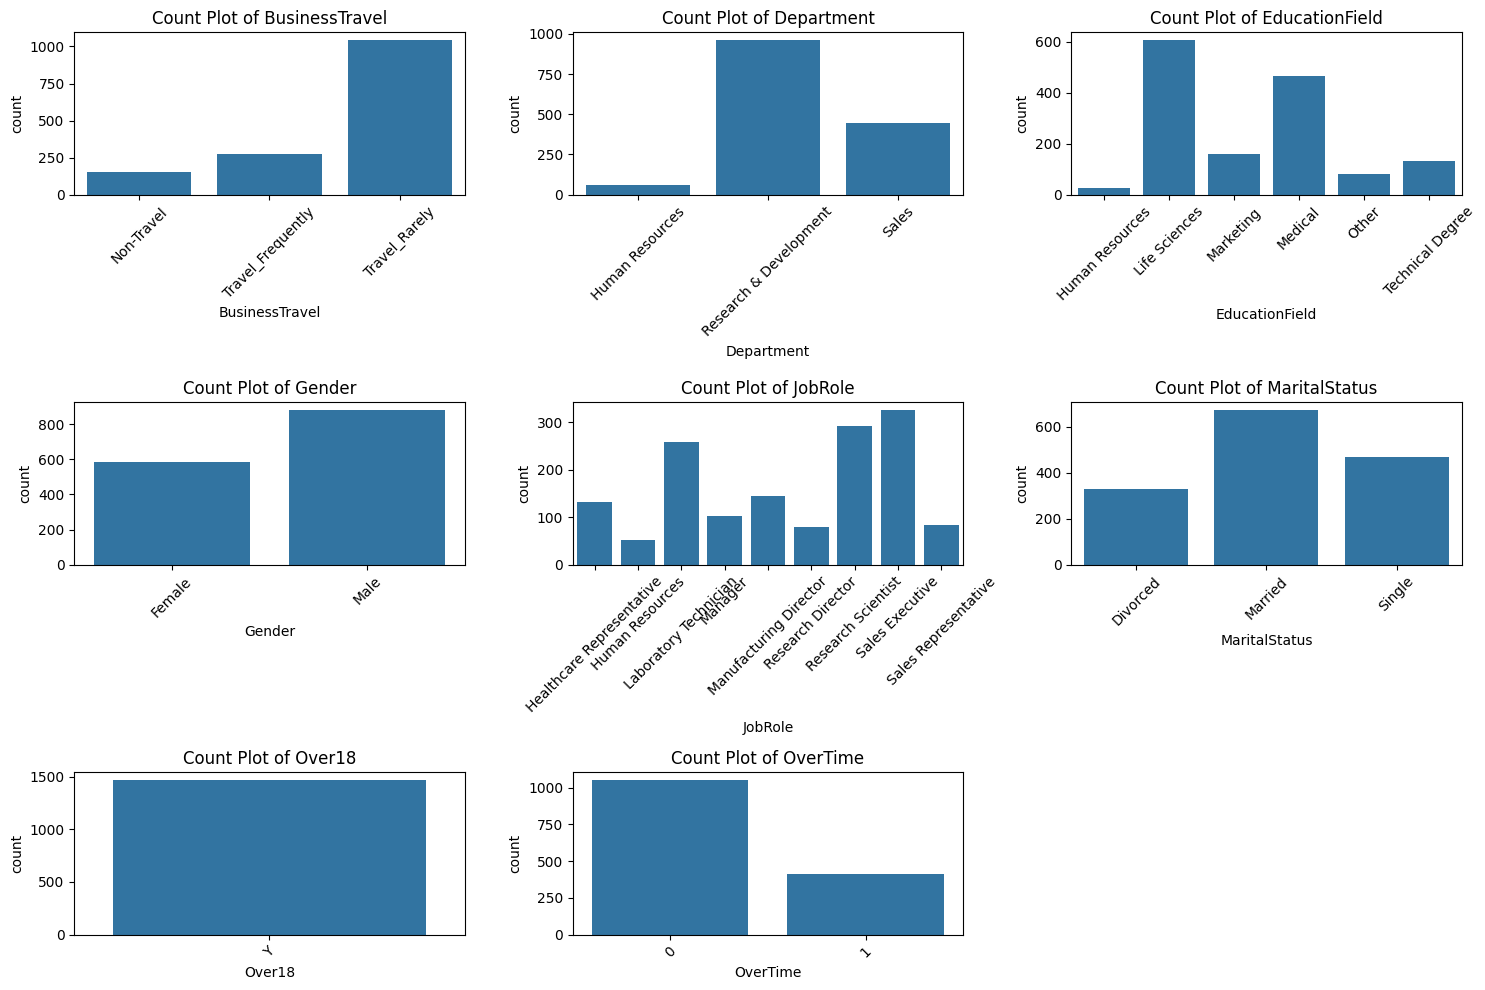

In [21]:
# Create a figure and axis objects for count plots
num_cols = 3  # Number of columns in the grid
num_rows = len(categorical_columns) // num_cols + (len(categorical_columns) % num_cols > 0)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each categorical variable count
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

The histograms and count plots illustrate the distribution of various features such as age, job satisfaction, overtime, and more within the dataset.

**Insights:**

The **attrition rate** is low, with the majority of employees staying with the company.

The distribution of age seems fairly normal, with most employees between 30 and 40 years old.

Most employees live relatively close to their workplace, with a noticeable drop-off beyond 10 miles.

The distribution of income appears to be right-skewed, with many employees earning between 2,000 and 5,000.

There is a significant proportion of employees who work overtime.

Most employees travel rarely, with fewer non-traveling and frequently traveling employees.

A significant number of employees are married, followed by single and divorced.

It shows that **EmployeeCount, Over18, StandardHours, and EmployeeNumber** are constant or irrelevant features, offering no predictive value.

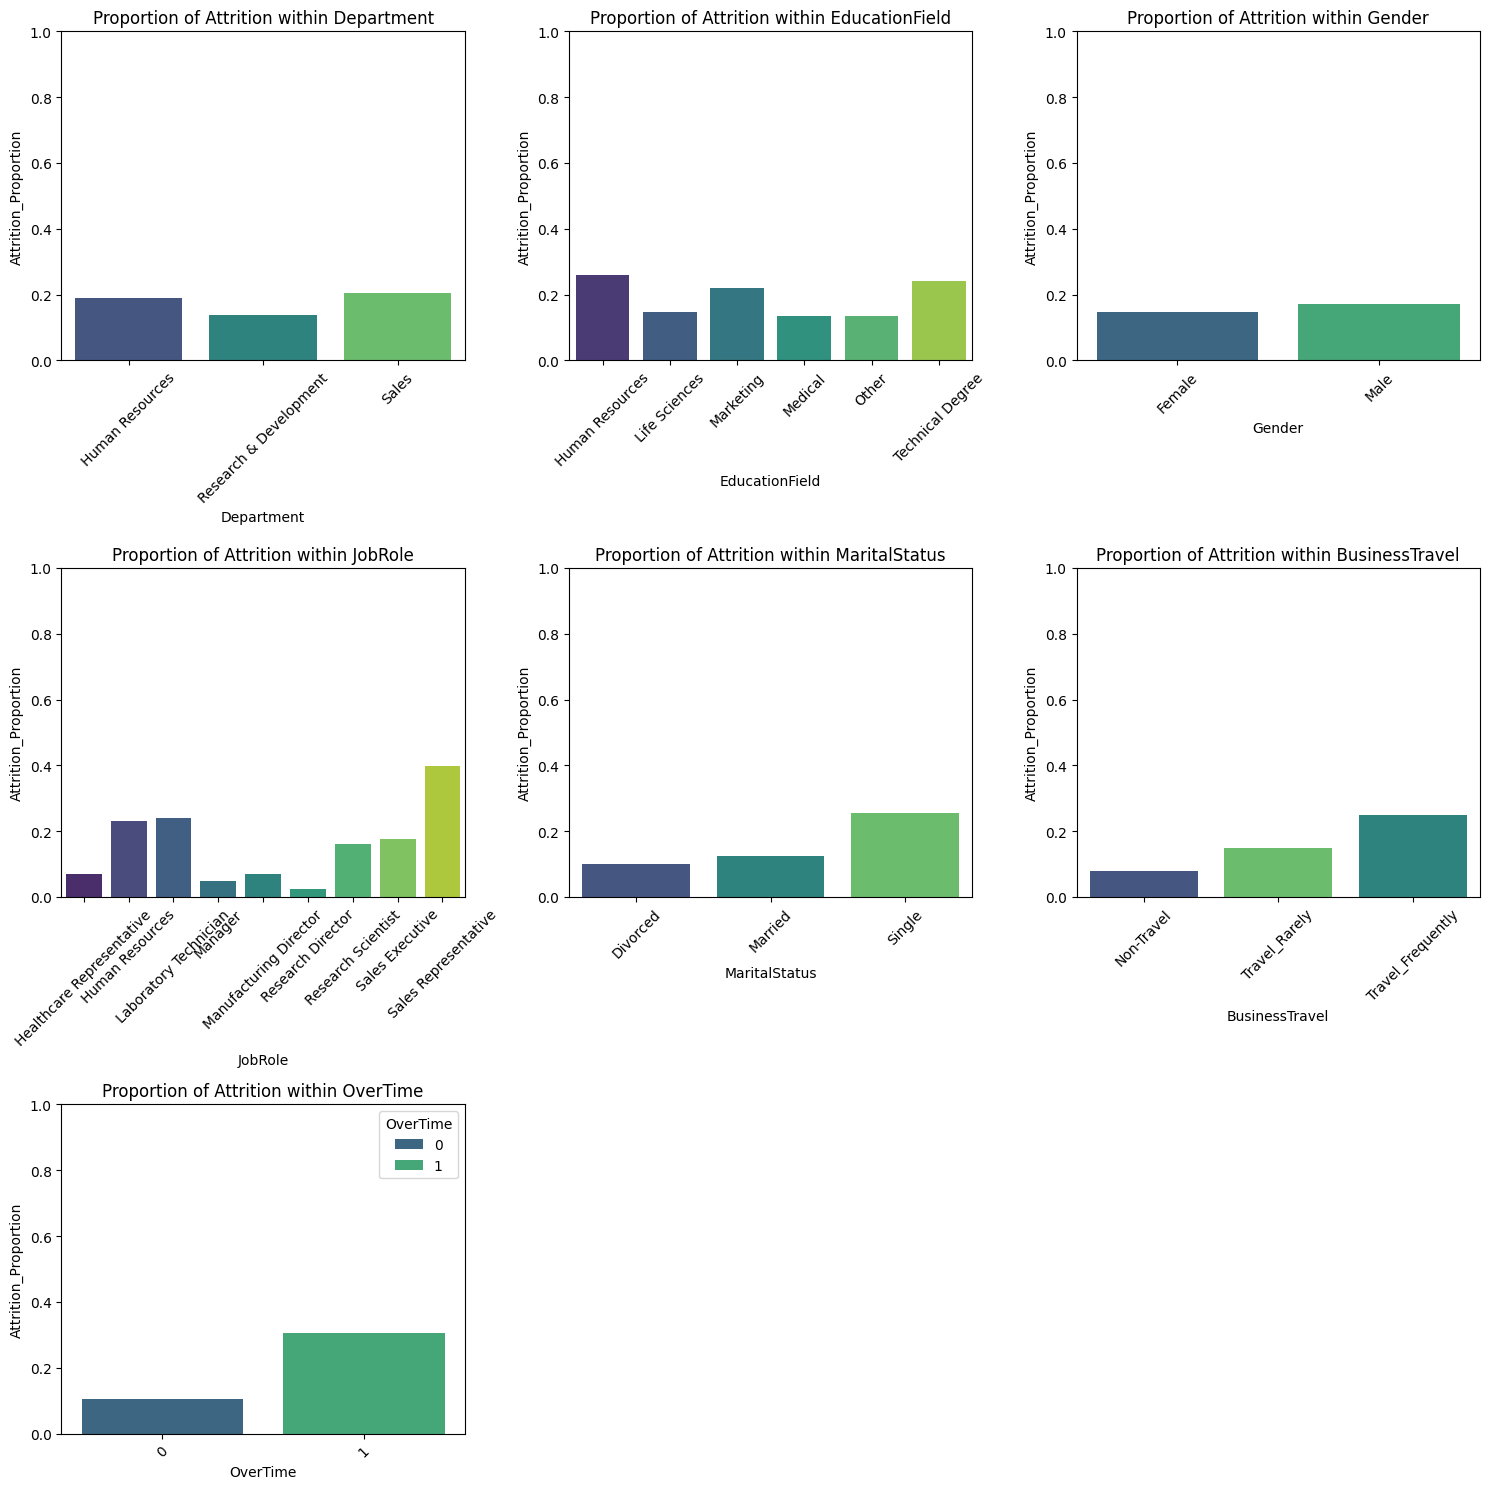

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of columns for the grid of plots
num_cols = 3  # Number of columns in the grid
num_rows = len(categorical_columns) // num_cols + (len(categorical_columns) % num_cols > 0)
categorical_columns = ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'BusinessTravel', 'OverTime']

# Create a figure and axis objects for proportion plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each categorical variable against Attrition proportion
for i, col in enumerate(categorical_columns):
    proportion_df = df.groupby(col)['Attrition'].mean().reset_index()
    proportion_df.columns = [col, 'Attrition_Proportion']

    if col == 'BusinessTravel':
        sns.barplot(data=proportion_df, x=col, y='Attrition_Proportion', hue=col, palette="viridis", ax=axes[i], order=['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'])
    else:
        sns.barplot(data=proportion_df, x=col, y='Attrition_Proportion', hue=col, palette="viridis", ax=axes[i])

    axes[i].set_title(f'Proportion of Attrition within {col}')
    axes[i].set_ylim(0, 1)
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


**1. Proportion of Attrition within Department**:
The Sales department seems to have a higher proportion of attrition compared to Research & Development and Human Resources.

**2. Proportion of Attrition within EducationField**:
Employees with a background in Human Resources, technical degrees and Marketing have a higher proportion of attrition compared to other fields like Life Sciences and Medical.

**3. Proportion of Attrition within Gender**:
There doesn't seem to be a significant difference in attrition proportions between males and females.

**4. Proportion of Attrition within JobRole**:
Certain roles, such as Sales Representative and Laboratory Technician, show higher attrition proportions. Roles like Research Scientist and Manager have lower proportions.

**5. Proportion of Attrition within MaritalStatus**:
Single employees have a higher proportion of attrition compared to married or divorced employees.

**6. Proportion of Attrition within BusinessTravel**:
Employees who travel frequently have a higher proportion of attrition compared to those who travel rarely or do not travel.

**7. Proportion of Attrition within Overtime**:
Employees working overtime have significantly higher attrition rates.

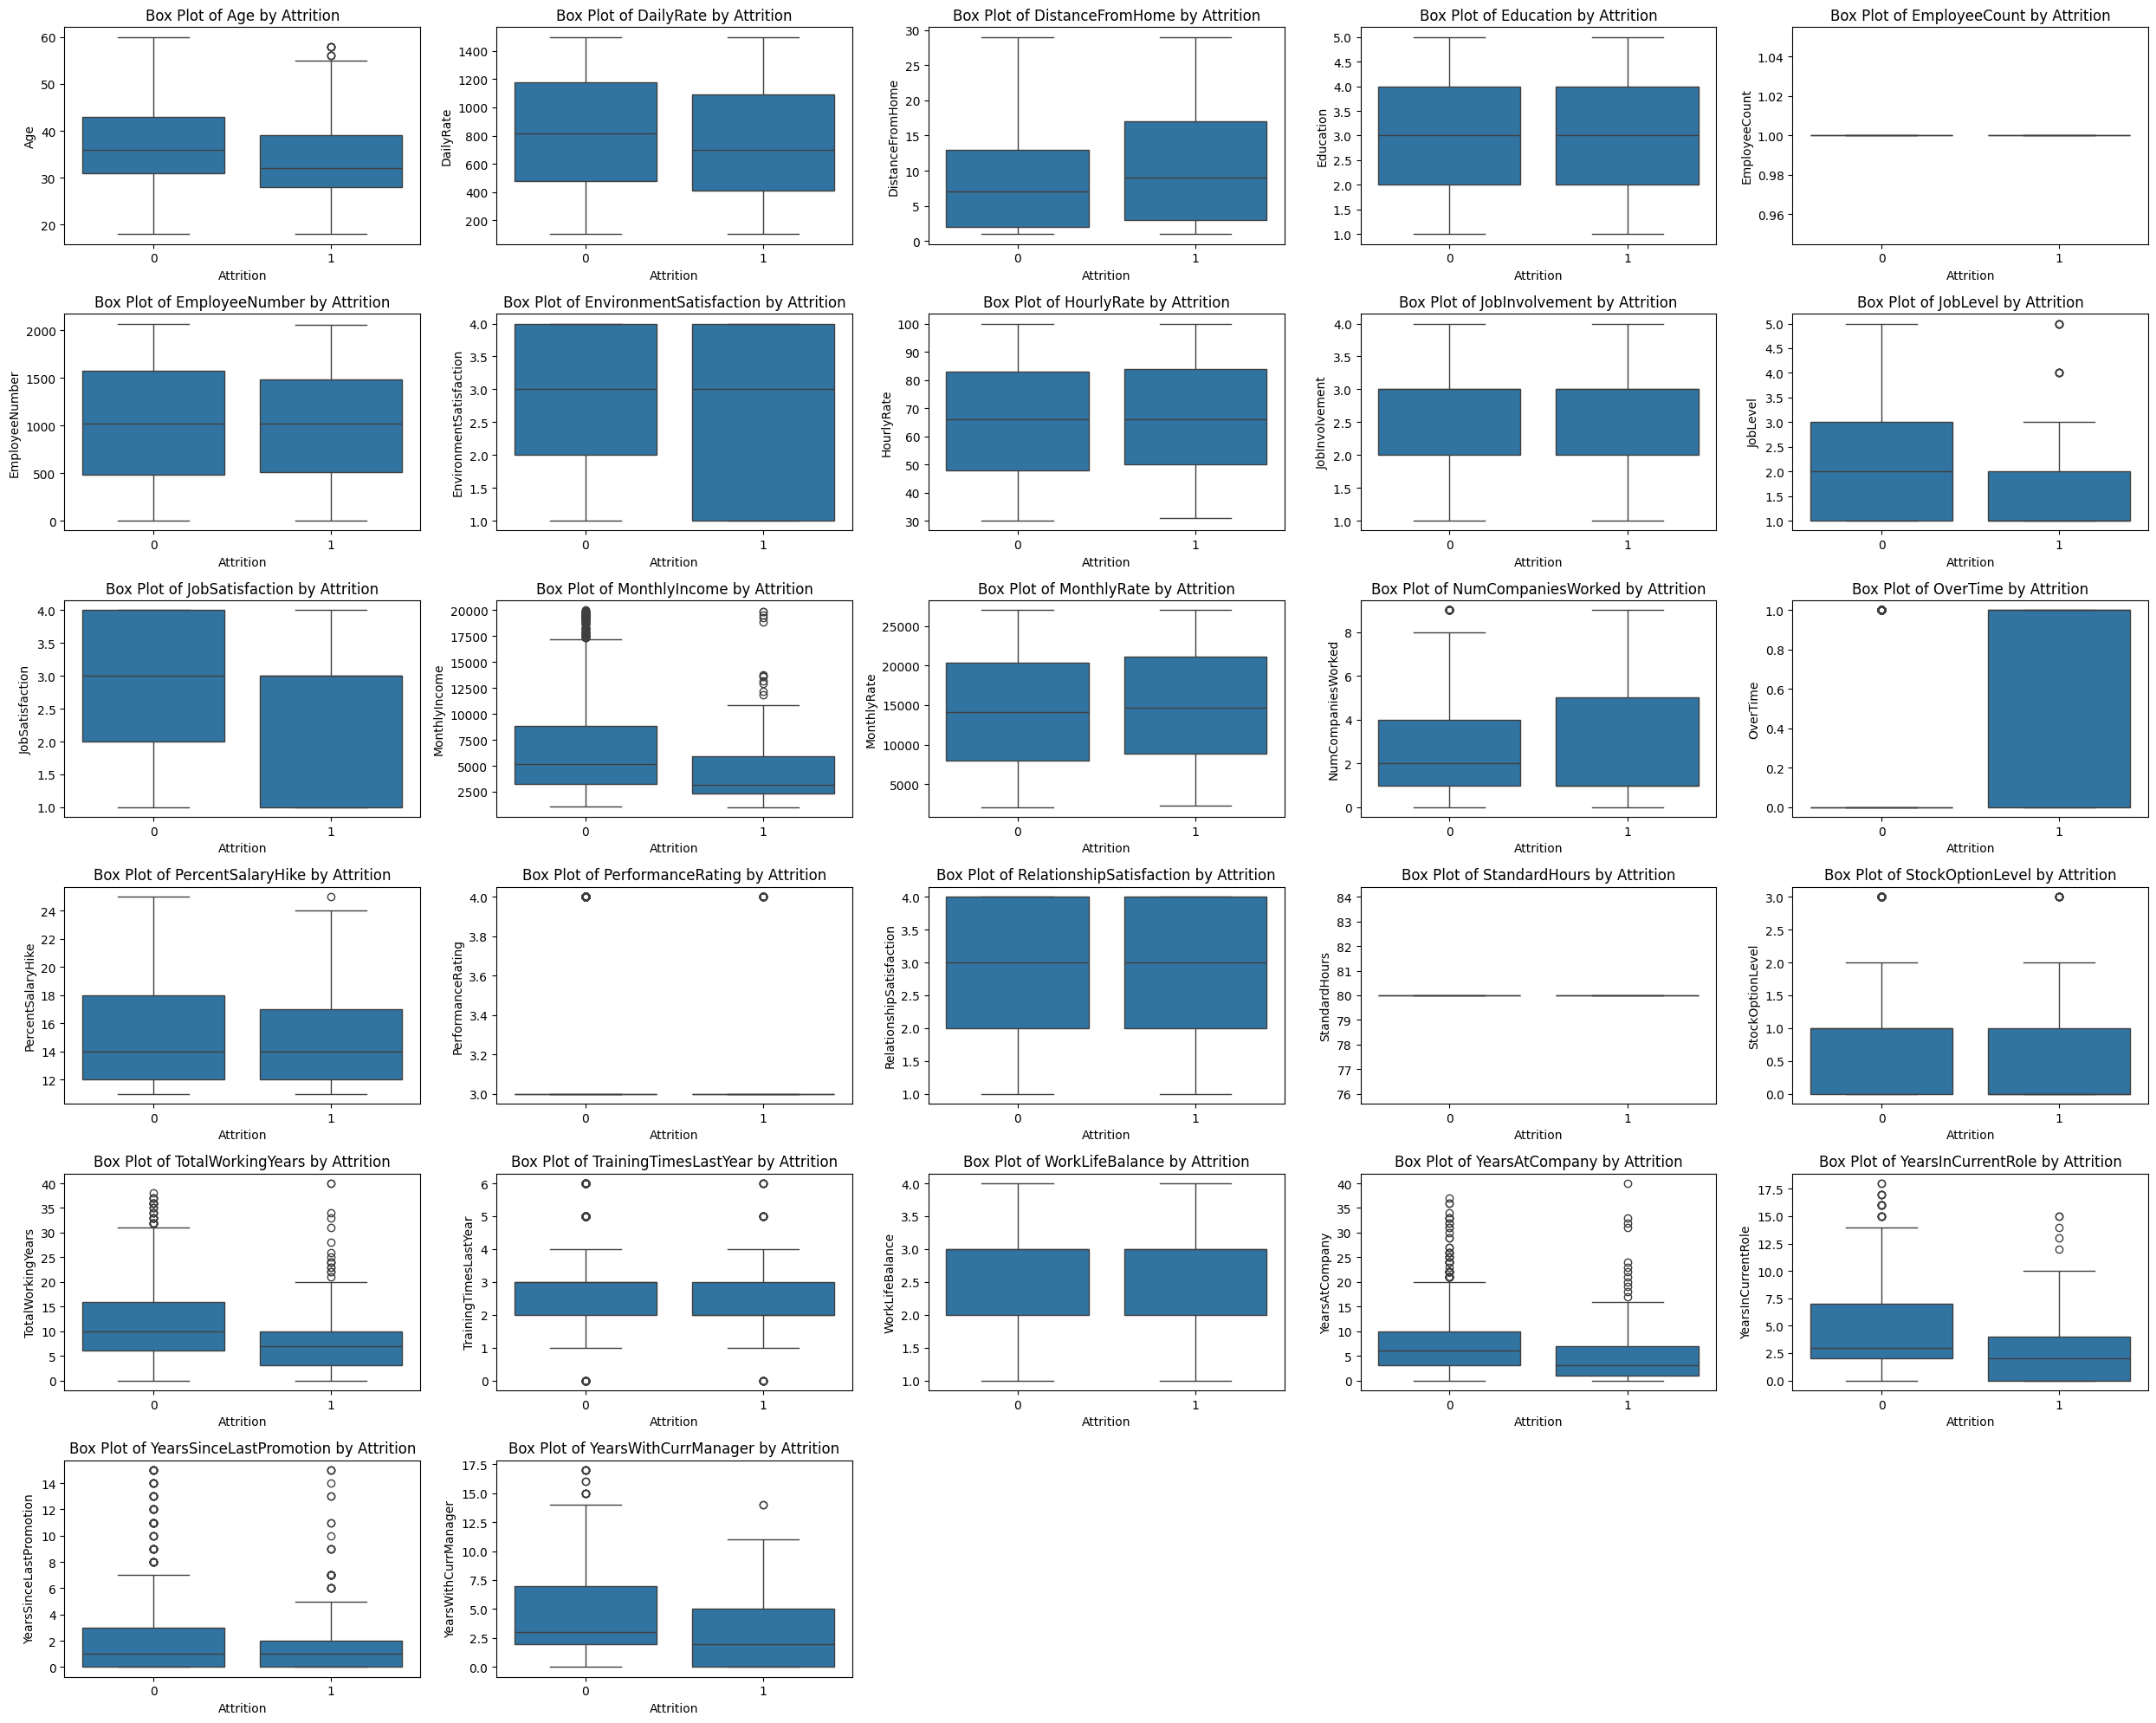

In [23]:
# Visualize the relationship between numerical variables and Attrition
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns.remove('Attrition')  # Exclude the target variable

# Define the number of rows and columns for the grid of plots
num_cols = 5  # Number of columns in the grid
num_rows = len(numerical_columns) // num_cols + (len(numerical_columns) % num_cols > 0)  # Calculate the number of rows needed

# Create a figure and axis objects
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical variable against Attrition
for i, col in enumerate(numerical_columns):
    sns.boxplot(x='Attrition', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col} by Attrition')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

The **box plots** illustrate the distribution of various features split by attrition status (0 = No, 1 = Yes). We will take a closer look at some interesting observations in the **next plots** to uncover deeper insights into factors influencing employee attrition.

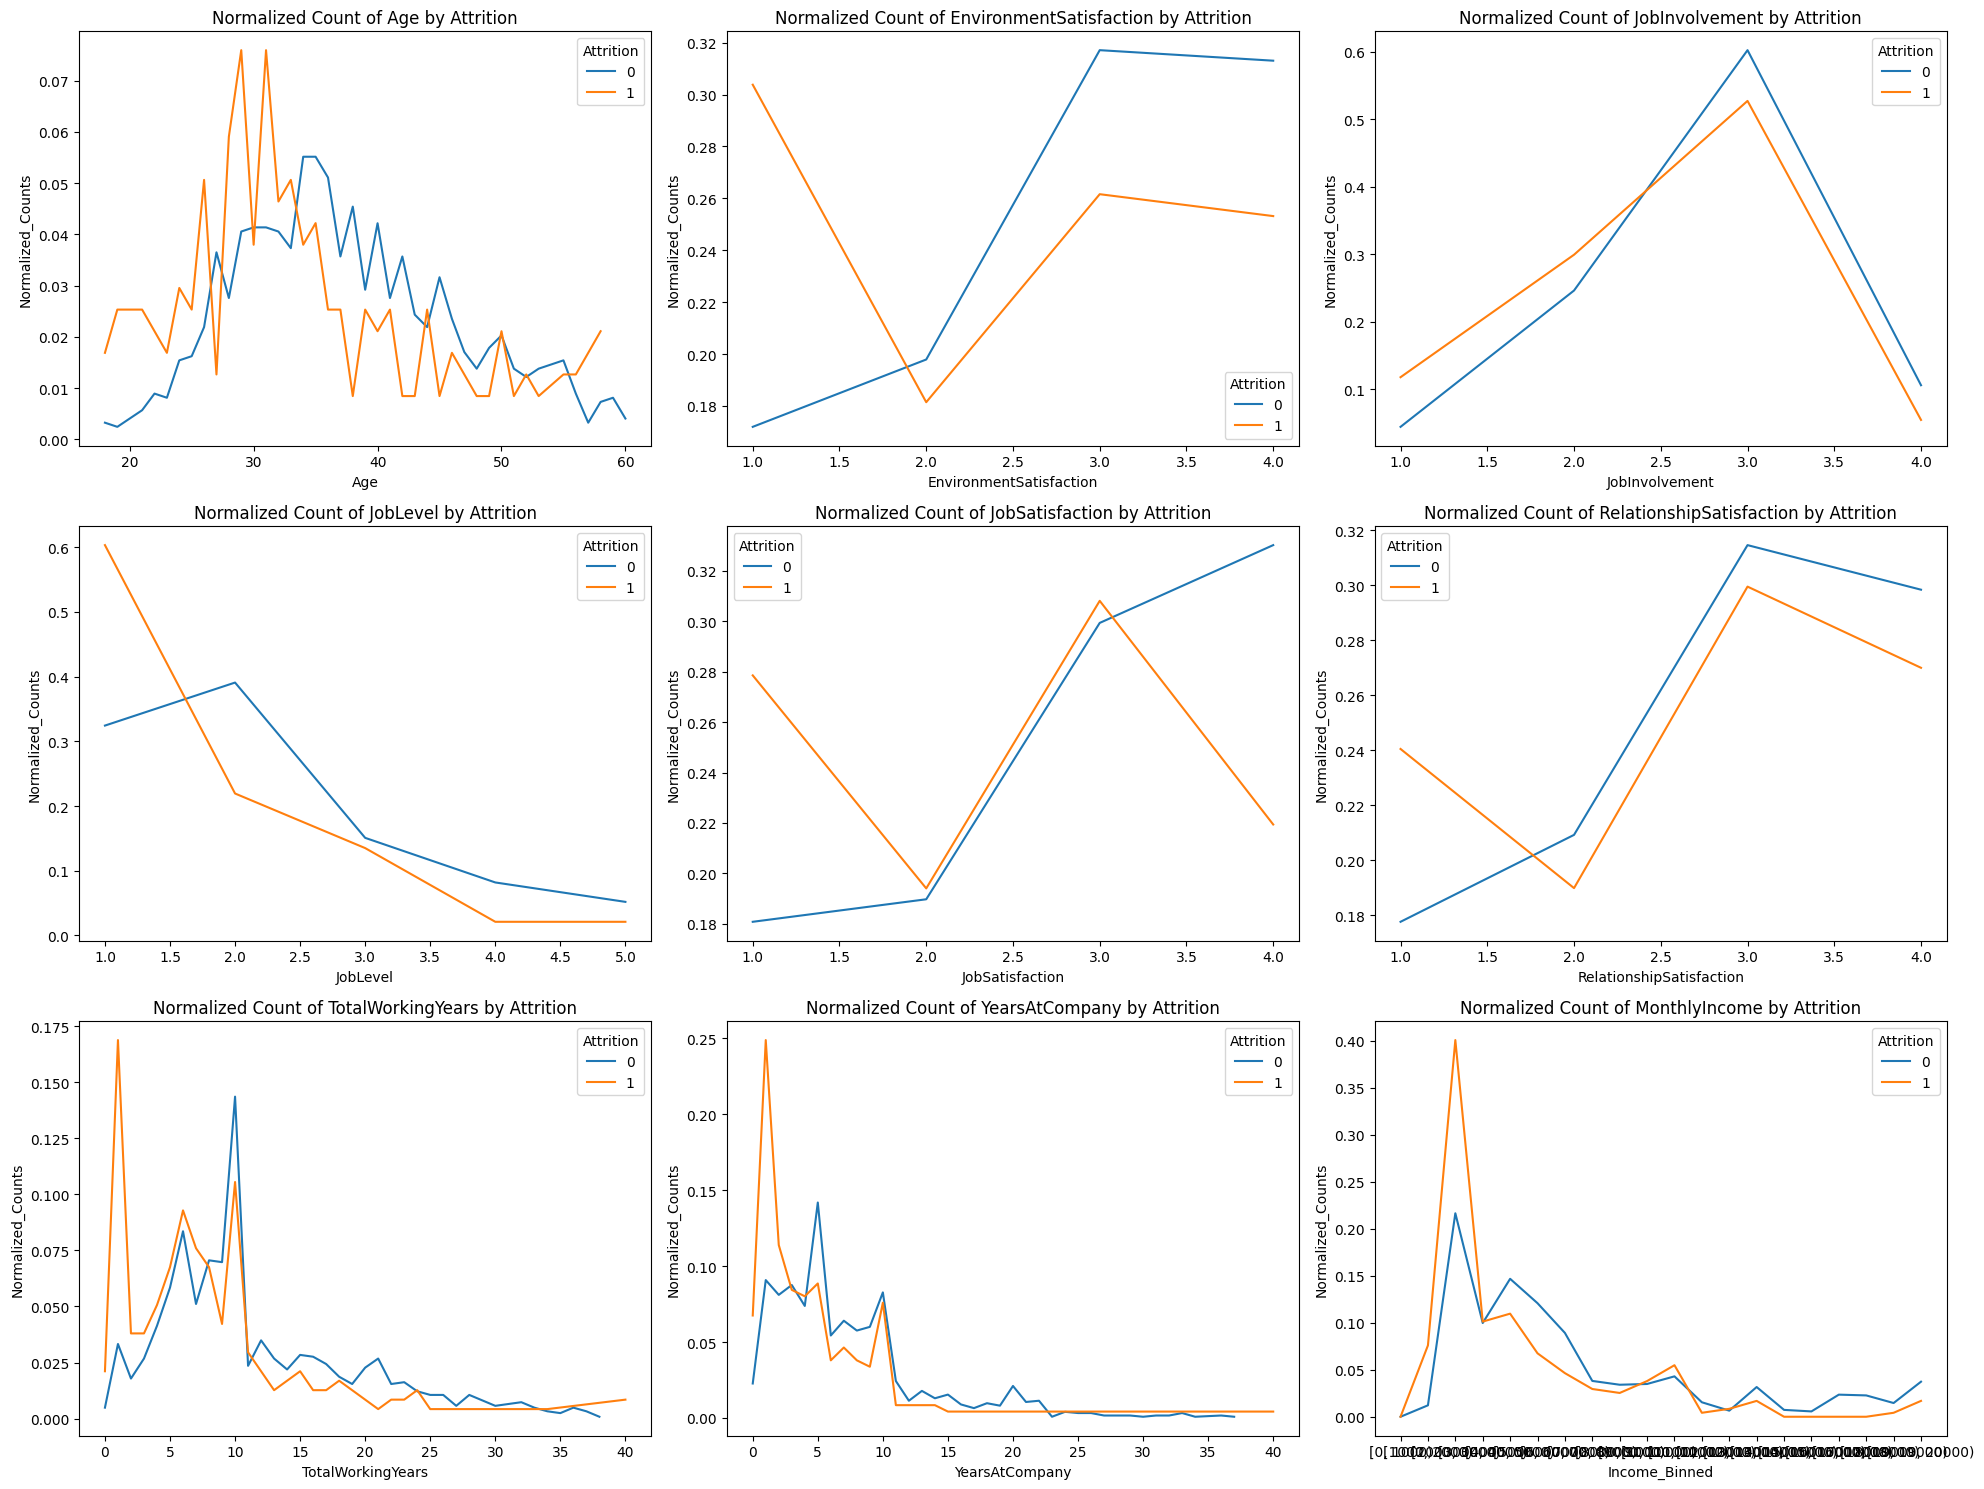

In [24]:
# List of numerical columns to visualize
numerical_columns = ['Age', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'RelationshipSatisfaction', 'TotalWorkingYears', 'YearsAtCompany']

# Calculate the total counts for each Attrition category
attrition_counts = df['Attrition'].value_counts()

# Define the number of rows and columns for the grid of plots
num_cols = 3  # Number of columns in the grid
num_rows = len(numerical_columns) // num_cols + (len(numerical_columns) % num_cols > 0)  # Calculate the number of rows needed

# Create a figure and axis objects
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical variable against Attrition
for i, col in enumerate(numerical_columns):
    grouped_data = df.groupby([col, 'Attrition']).size().reset_index(name='Counts')
    # Normalize the counts by dividing by the total number of instances in each Attrition category
    grouped_data['Normalized_Counts'] = grouped_data.apply(lambda x: x['Counts'] / attrition_counts[x['Attrition']], axis=1)

    # Plot using seaborn
    sns.lineplot(x=col, y='Normalized_Counts', hue='Attrition', data=grouped_data, ax=axes[i])
    axes[i].set_title(f'Normalized Count of {col} by Attrition')
    axes[i].legend(title='Attrition')

# MonthlyIncome
bin_size = 1000  # Adjust the bin size as needed

# Create line plot specifically for MonthlyIncome
col = 'MonthlyIncome'
df['Income_Binned'] = pd.cut(df[col], bins=range(0, int(df[col].max()) + bin_size, bin_size), right=False)
grouped_data = df.groupby(['Income_Binned', 'Attrition']).size().reset_index(name='Counts')
# Normalize the counts by dividing by the total number of instances in each Attrition category
grouped_data['Normalized_Counts'] = grouped_data.apply(lambda x: x['Counts'] / attrition_counts[x['Attrition']], axis=1)
# Convert bins to string for better plotting
grouped_data['Income_Binned'] = grouped_data['Income_Binned'].astype(str)

# Add the MonthlyIncome plot to the grid
sns.lineplot(x='Income_Binned', y='Normalized_Counts', hue='Attrition', data=grouped_data, ax=axes[-1])
axes[-1].set_title('Normalized Count of MonthlyIncome by Attrition')
axes[-1].legend(title='Attrition')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

The **line plots** show the **normalized** counts of various features split by attrition status (0 = No, 1 = Yes). Here are the main conclusions:

**1. Age by Attrition:**
Higher attrition is observed among younger employees, especially those in their 20s and early 30s, whereas older employees show less attrition.

**2. EnvironmentSatisfaction by Attrition:**
Employees with lower environment satisfaction (level 1) show higher attrition rates compared to those with higher satisfaction levels.

**3. JobInvolvement by Attrition:**
Higher job involvement (levels 3 and 4) is associated with lower attrition, while lower job involvement correlates with higher attrition.

**4. JobLevel by Attrition:**
Employees at lower job levels (1 and 2) experience higher attrition rates, while those at higher levels (3 to 5) show less attrition.

**5. JobSatisfaction by Attrition:**
Higher job satisfaction (level 4) is linked to lower attrition, while lower job satisfaction correlates with higher attrition.

**6. RelationshipSatisfaction by Attrition:**
Higher relationship satisfaction (levels 3 and 4) is associated with lower attrition, whereas lower satisfaction shows mixed results.

**7. TotalWorkingYears by Attrition:**
Employees with fewer working years (especially 0-10 years) show higher attrition rates. Attrition decreases as total working years increase.

**8. YearsAtCompany by Attrition:**
Higher attrition rates are observed among employees with fewer years at the company, particularly those with less than 5 years.

**9. MonthlyIncome by Attrition:**
Employees with lower monthly incomes show higher attrition rates, while those with higher incomes tend to stay longer.

# **4. Feature Engineering**
Label Encoding and Ordinal Encoding: categorical variables converted into numerical formats suitable for modeling.

Dropping certain columns:  features that are constant or irrelevant removed, such as EmployeeCount, EmployeeNumber, Over18, StandardHours.

In [25]:
# Step 4: Feature Engineering
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

label = LabelEncoder()
for column in categorical_columns:
    df[column] = label.fit_transform(df[column])

In [26]:
# Ordinal Encoding for 'BusinessTravel'
business_travel_mapping = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
df['BusinessTravel'] = df['BusinessTravel'].map(business_travel_mapping)

# Convert 'BusinessTravel' and 'OverTime' to int64
df['BusinessTravel'] = df['BusinessTravel'].astype('int64')

In [27]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours','Income_Binned'], axis="columns", inplace=True)

# **5+6. Model Selection and Training**
Models (Logistic Regression, Random Forest, XGBoost) are trained on the training set and predictions are made on the test set.

In [28]:
# Step 5: Model Selection and Training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [29]:
# Split data into features and target variable
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [30]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# Standardize features for Logistic Regression and optionally for XGBoost
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Initialize models
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier(n_estimators=100)
xgb_clf = XGBClassifier()

In [33]:
# Train models
log_reg.fit(X_train_scaled, y_train)  # scaled data
rf_clf.fit(X_train, y_train)          # original data
xgb_clf.fit(X_train, y_train)         # original data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [34]:
# Make predictions
log_reg_pred = log_reg.predict(X_test_scaled)  # Use scaled data
rf_clf_pred = rf_clf.predict(X_test)           # Use original data
xgb_clf_pred = xgb_clf.predict(X_test)         # Use original data

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [36]:
from tabulate import tabulate

In [37]:
# Evaluate models
models = {'Logistic Regression': log_reg_pred, 'Random Forest': rf_clf_pred, 'XGBoost': xgb_clf_pred}
for model_name, predictions in models.items():
    report_dict = classification_report(y_test, predictions, output_dict=True)
    report_dict.pop('macro avg', None)
    report_dict.pop('weighted avg', None)

    accuracy = accuracy_score(y_test, predictions)

    # Print model name and accuracy
    print(f'{model_name} Performance:')
    print(f'Accuracy: {accuracy:.4f}')  # Format accuracy to 4 decimal places

    # Create a DataFrame for better formatting of classification report
    report_df = pd.DataFrame(report_dict).transpose()

    # Convert classification report to table format using tabulate
    report_table = tabulate(report_df, headers='keys', tablefmt='fancy_grid')

    # Print formatted classification report
    print(report_table)
    print('')  # Print empty line for separation

Logistic Regression Performance:
Accuracy: 0.8707
╒══════════╤═════════════╤══════════╤════════════╤════════════╕
│          │   precision │   recall │   f1-score │    support │
╞══════════╪═════════════╪══════════╪════════════╪════════════╡
│ 0        │    0.894866 │ 0.963158 │   0.927757 │ 380        │
├──────────┼─────────────┼──────────┼────────────┼────────────┤
│ 1        │    0.5625   │ 0.295082 │   0.387097 │  61        │
├──────────┼─────────────┼──────────┼────────────┼────────────┤
│ accuracy │    0.870748 │ 0.870748 │   0.870748 │   0.870748 │
╘══════════╧═════════════╧══════════╧════════════╧════════════╛

Random Forest Performance:
Accuracy: 0.8685
╒══════════╤═════════════╤══════════╤════════════╤════════════╕
│          │   precision │   recall │   f1-score │    support │
╞══════════╪═════════════╪══════════╪════════════╪════════════╡
│ 0        │    0.874419 │ 0.989474 │   0.928395 │ 380        │
├──────────┼─────────────┼──────────┼────────────┼────────────┤
│ 1      

# **Explanation:**

**Logistic Regression Performance:**

Accuracy: 0.8707


**Random Forest Performance:**

Accuracy: 0.8639


**XGBoost Performance:**

Accuracy: 0.8730

1. Accuracy: All models have similar accuracy, around 87%.

2. Class 0 Performance: All models perform well on classifying non-attrition cases (Class 0), with high precision, recall, and F1-scores.

3. Class 1 Performance:

      - Logistic Regression and XGBoost have higher recall for attrition cases compared to Random Forest, making them better at identifying true attrition cases.

      - Random Forest has the highest precision for attrition cases, meaning it makes fewer false positive errors but misses many true attrition cases (low recall).

**Overall:**

All models have similar overall accuracy, but **Logistic Regression and XGBoost** perform slightly better in identifying attrition cases (Class 1) compared to Random Forest, which has better precision but poor recall for Class 1. This indicates that Logistic Regression and XGBoost might be more suitable for identifying potential attrition, albeit with room for improvement in handling **class imbalance**.

In [38]:
# Explainability with SHAP
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 7.4 MB/s eta 0:00:00


In [39]:
# SHAP values for XGBoost (as an example)
explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X_test)

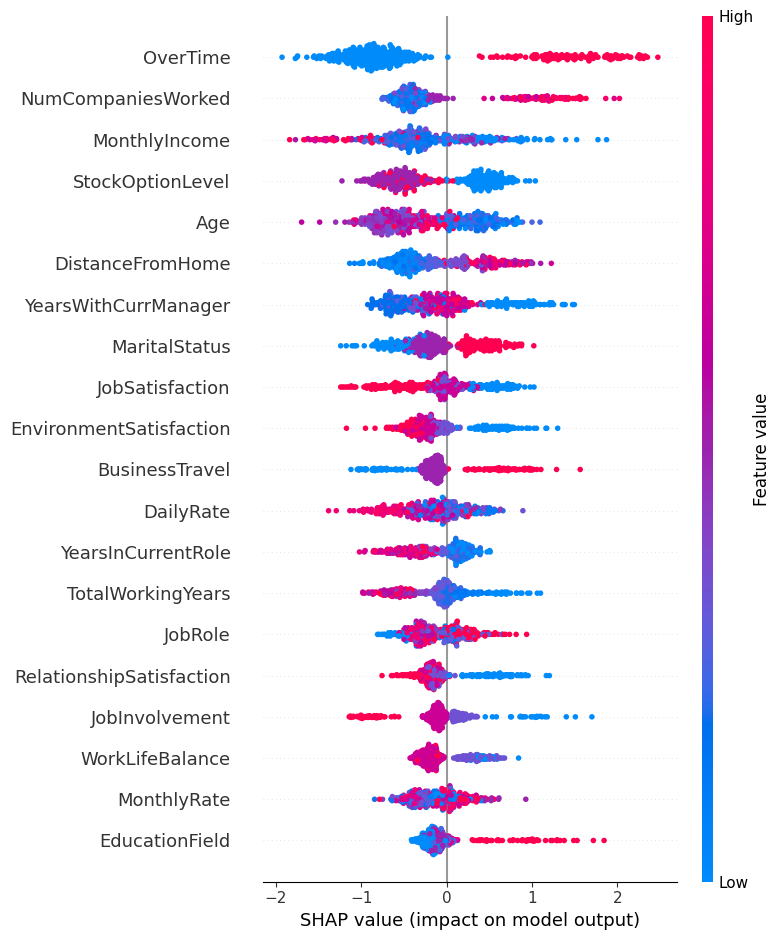

In [40]:
# Summary plot
shap.summary_plot(shap_values, X_test)

In [41]:
# Get feature importances
feature_importances_rf = rf_clf.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_rf})

# Sort the features by importance in descending order
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Print the feature importance
print("Random Forest Feature Importance:")
print(feature_importance_df_rf)

Random Forest Feature Importance:
                     Feature  Importance
0              MonthlyIncome    0.078604
1                        Age    0.063163
2                   OverTime    0.058796
3          TotalWorkingYears    0.052857
4                  DailyRate    0.052597
5                MonthlyRate    0.050185
6           DistanceFromHome    0.048806
7                 HourlyRate    0.048616
8             YearsAtCompany    0.043671
9         NumCompaniesWorked    0.037280
10          StockOptionLevel    0.034866
11         PercentSalaryHike    0.034060
12      YearsWithCurrManager    0.032868
13             MaritalStatus    0.029851
14   YearsSinceLastPromotion    0.029057
15                   JobRole    0.028999
16        YearsInCurrentRole    0.028139
17     TrainingTimesLastYear    0.027726
18  RelationshipSatisfaction    0.024723
19   EnvironmentSatisfaction    0.024557
20            EducationField    0.023670
21                  JobLevel    0.023501
22           JobSatisfa

# **Explanation of Feature Importance for Random Forest and XGBoost**

Feature importance was analyzed for the Random Forest and XGBoost models to identify the most influential factors contributing to employee attrition. The SHapley Additive exPlanations (SHAP) method was employed to further elucidate the impact of each feature on the model's predictions. SHAP values provide a comprehensive understanding of feature contributions by quantifying the effect of each feature on the model's output. Key features identified for the models include Monthly Income, Age, OverTime, Distance From Home, Stock Option Level and Marital Status.